In [77]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [78]:
np.random.seed(5151)
merged_df = pd.read_csv('./processed_data/merged_df.csv')
merged_df = merged_df.drop(columns=['Unnamed: 0'])
print(merged_df.head())

         Date  GameID Outcome  TeamPoints  PlayerID  MaxSpeedInGame  \
0  2017-11-30       1       W          19         2        7.284728   
1  2017-11-30       1       W          19         3        6.852436   
2  2017-11-30       1       W          19         4        7.267784   
3  2017-11-30       1       W          19         6        6.338894   
4  2017-11-30       1       W          19         7        7.065283   

   MaxAccelImpulseInGame  AcuteLoad  ChronicLoad  AcuteChronicRatio  ...  \
0               4.423615     206.57       371.20               0.56  ...   
1               4.888893     407.86       454.67               0.90  ...   
2               5.694449     236.00       406.90               0.58  ...   
3               4.777782     297.29       415.87               0.71  ...   
4               4.091273     237.57       476.60               0.50  ...   

   Illness  Nutrition  StandardizedMonitoringScore  StandardizedPain  \
0      3.0        2.0                     0.

In [79]:
rpe_df = pd.read_csv('./processed_data/processed_rpe.csv')
rpe_df = rpe_df.drop(columns=['Unnamed: 0'])
print(rpe_df.head())

         Date  PlayerID  Training SessionType  Duration  RPE  SessionLoad  \
0  2017-08-01        15         1    Strength      60.0  4.0        240.0   
1  2017-08-01         1         1       Speed      60.0  3.0        180.0   
2  2017-08-01         1         1    Strength      90.0  4.0        360.0   
3  2017-08-01         3         1       Speed      45.0  5.0        225.0   
4  2017-08-01         3         1    Strength      90.0  5.0        450.0   

   DailyLoad  AcuteChronicRatio  ObjectiveRating  FocusRating  \
0      300.0               4.29              6.0          7.0   
1      540.0               4.29              0.0          0.0   
2      540.0               4.29              0.0          0.0   
3      675.0               4.29              7.0          7.0   
4      675.0               4.29              7.0          7.0   

   BestOutOfMyself  AcuteLoad  ChronicLoad  
0              3.0      42.86         10.0  
1              3.0      77.14         18.0  
2          

In [80]:
wellness_df = pd.read_csv('./processed_data/processed_wellness.csv')
wellness_df = wellness_df.drop(columns=['Unnamed: 0'])
print(wellness_df.head())

         Date  PlayerID  MonitoringScore  Fatigue  Soreness  Desire  \
0  2018-07-21         1               13        3         3       2   
1  2018-07-21         2               19        4         3       4   
2  2018-07-21         3               19        3         3       5   
3  2018-07-21         4               15        2         3       5   
4  2018-07-21         5               20        5         3       4   

   Irritability  SleepScore  SleepHours  SleepQuality  TrainingReadiness  \
0             3        16.0        8.00             2                  0   
1             4        32.0        8.00             4                  0   
2             4        32.0        8.00             4                100   
3             4         6.5        6.50             1                 95   
4             4        29.0        7.25             4                100   

   Pain  Illness  Nutrition  StandardizedMonitoringScore  StandardizedPain  \
0     1        3          3           

In [81]:
merged_df.columns

Index(['Date', 'GameID', 'Outcome', 'TeamPoints', 'PlayerID', 'MaxSpeedInGame',
       'MaxAccelImpulseInGame', 'AcuteLoad', 'ChronicLoad',
       'AcuteChronicRatio', 'MonitoringScore', 'Fatigue', 'Soreness', 'Desire',
       'Irritability', 'SleepScore', 'SleepHours', 'SleepQuality',
       'TrainingReadiness', 'Pain', 'Illness', 'Nutrition',
       'StandardizedMonitoringScore', 'StandardizedPain',
       'StandardizedIllness', 'StandardizedNutrition',
       'StandardizedTrainingReadiness', 'wellness', 'SquaredAcuteChronicRatio',
       'CubedAcuteChronicRatio'],
      dtype='object')

# Performance vs Training load graphs per player

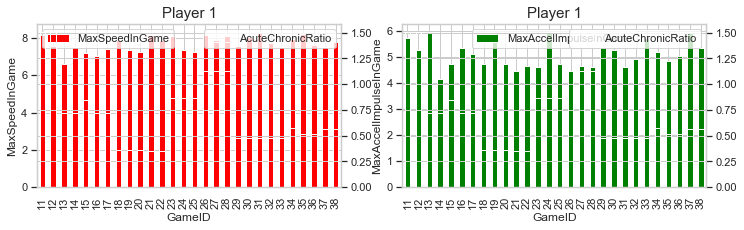

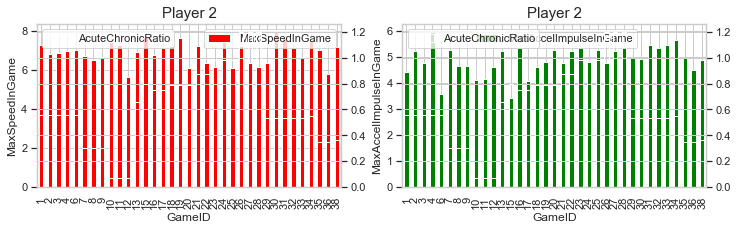

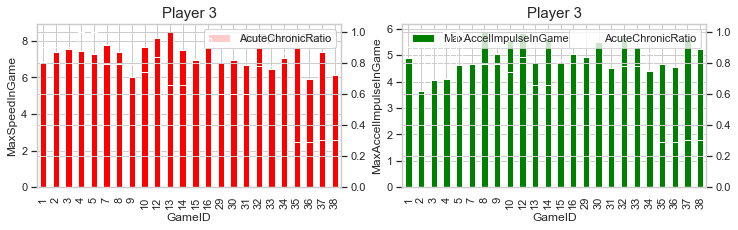

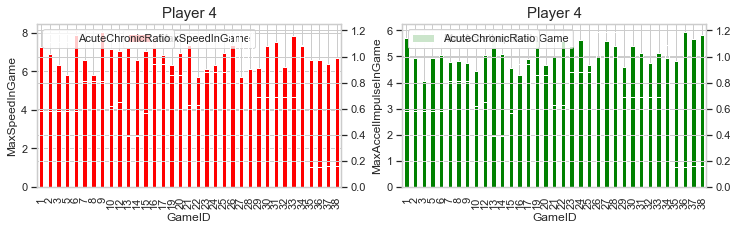

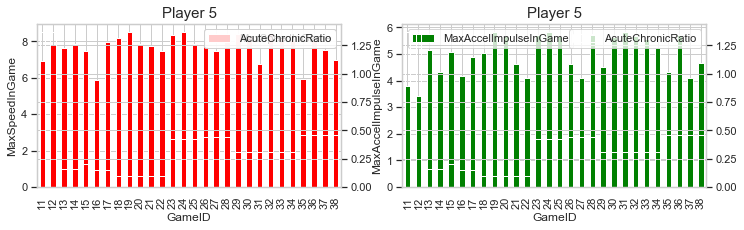

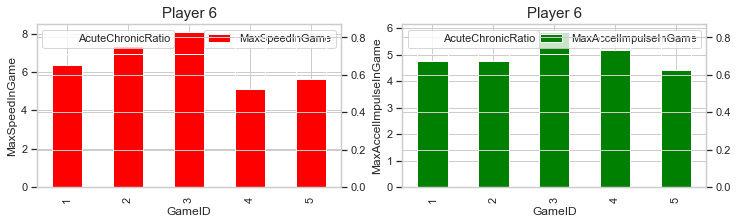

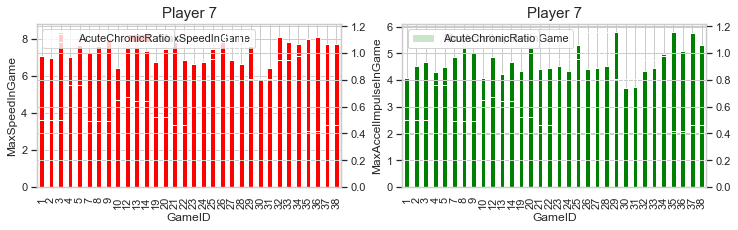

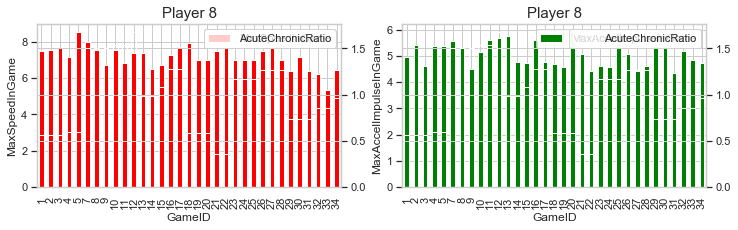

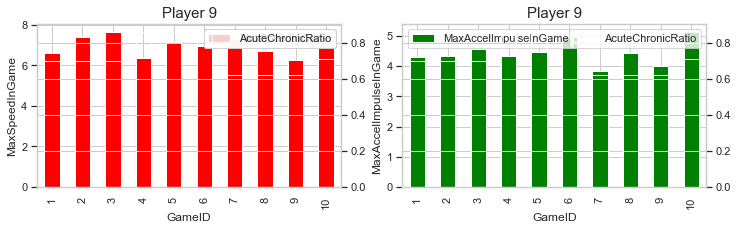

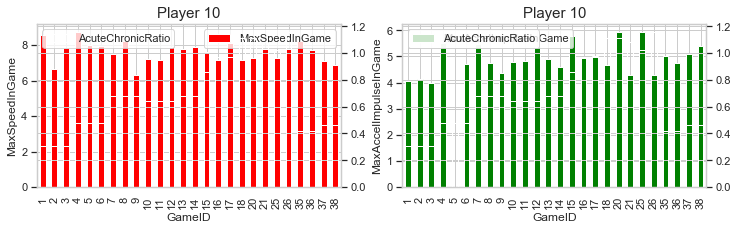

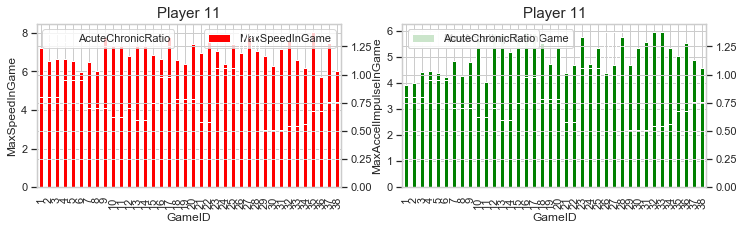

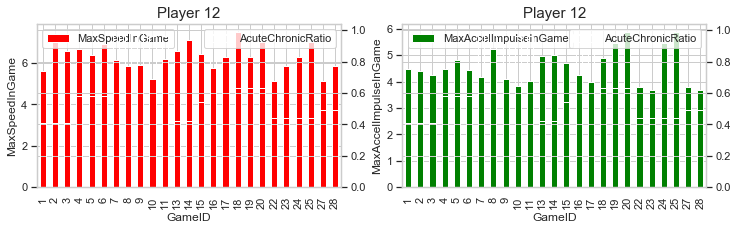

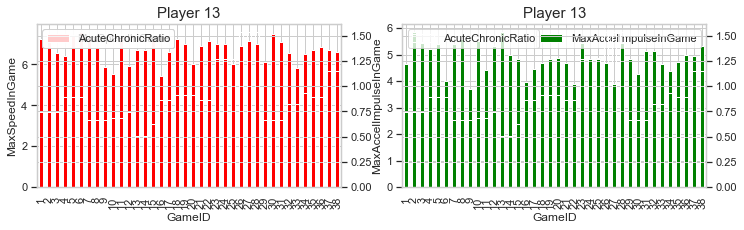

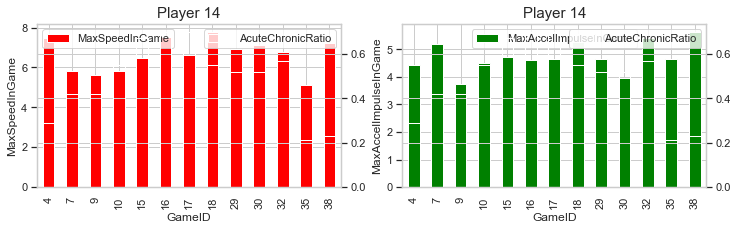

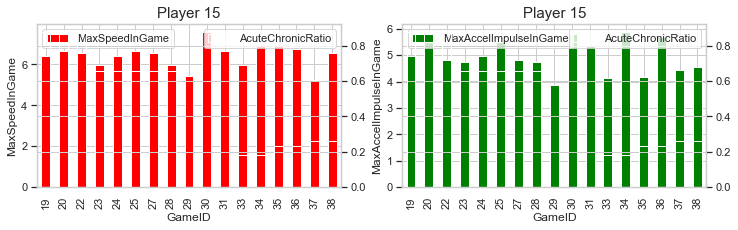

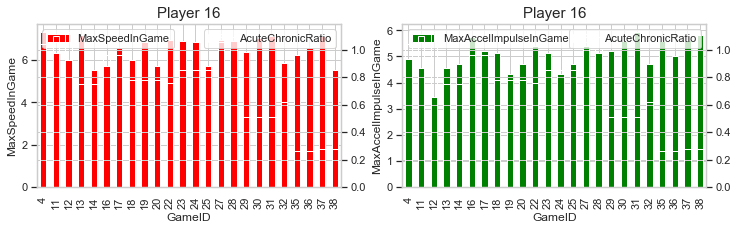

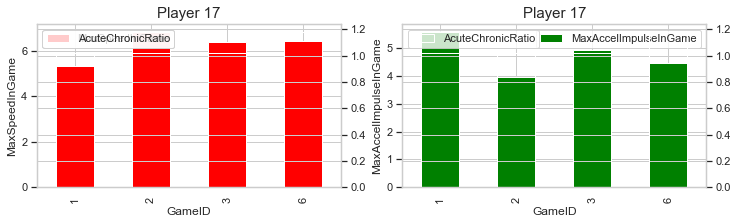

In [82]:
grouped = merged_df.groupby('PlayerID')

for name,group in grouped:
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(121)
#     group[]
    group.plot.bar(ax=ax1, color='red',x="GameID",y="MaxSpeedInGame")
    ax1.set_ylabel('MaxSpeedInGame')
    ax3 = ax1.twinx()
    group.plot.bar(ax=ax3, color='blue',x="GameID",y="AcuteChronicRatio",fill=False)

    ax1.set_title('Player ' + str(name), fontsize=15)

#     plt.xticks(group["MaxSpeedInGame"], group["MaxSpeedInGame"], rotation=90)
    ax2 = fig.add_subplot(122)
    group.plot.bar(ax=ax2, color='green',x="GameID",y="MaxAccelImpulseInGame")
    ax2.set_ylabel('MaxAccelImpulseInGame')
    ax4 = ax2.twinx()
    group.plot.bar(ax=ax4, color='blue',
                    x='GameID',
                    y="AcuteChronicRatio",fill=False)
    #ax4.tick_params('AcuteLoad', colors='b')
    
    #ax1.set_xticks(np.arange(1, 39, 1.0))
    ax2.set_title('Player ' + str(name), fontsize=15)

plt.show()
plt.close()

# Performance vs Training load graphs for each game for all players

C:\Users\Sarasadat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


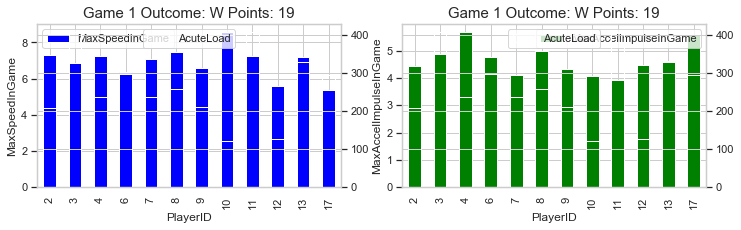

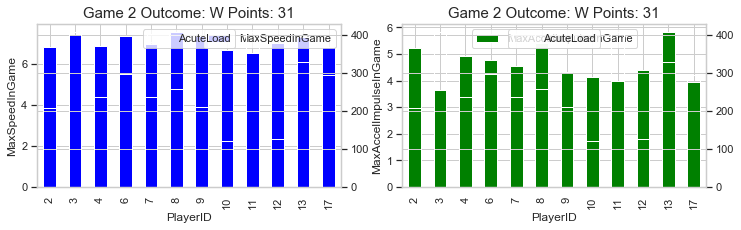

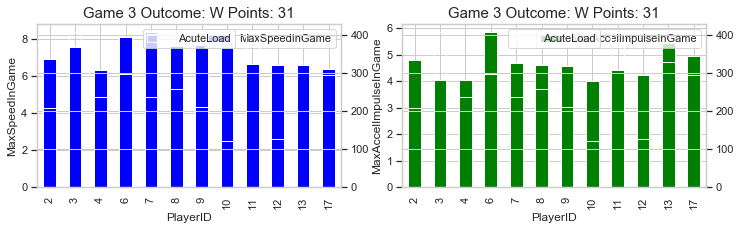

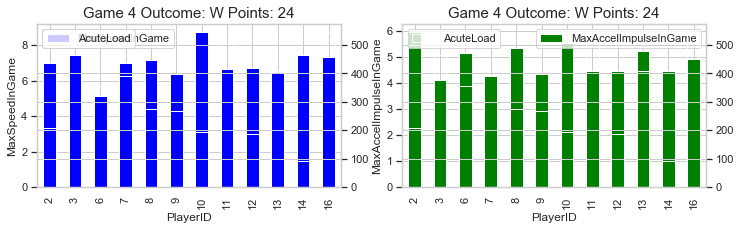

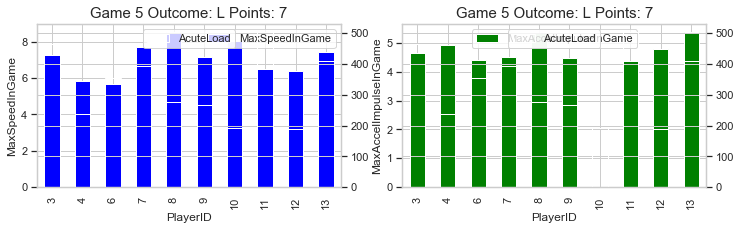

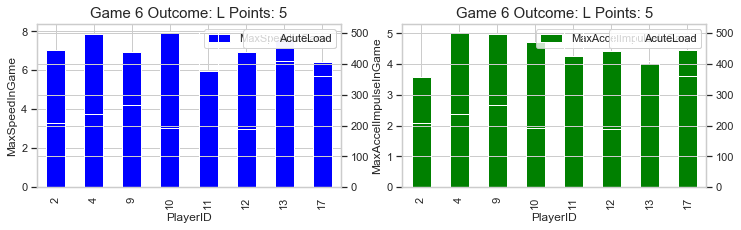

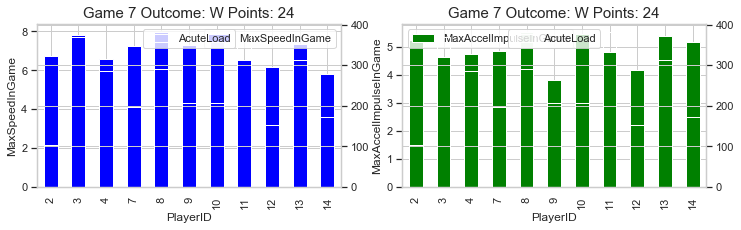

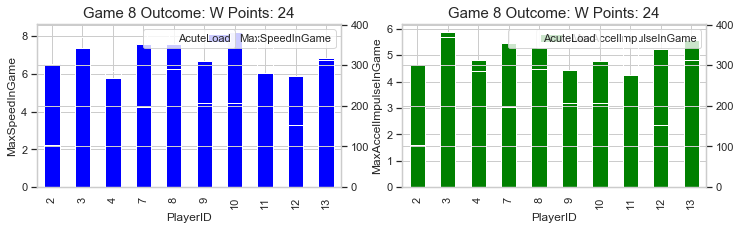

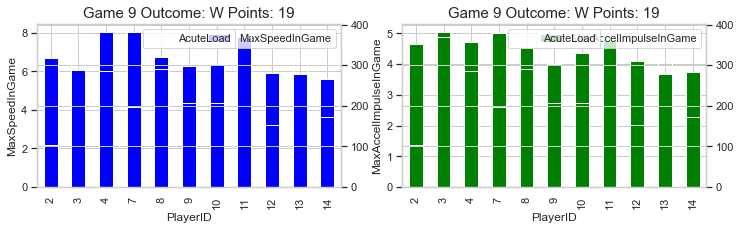

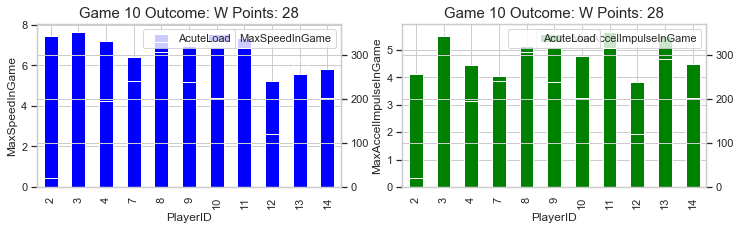

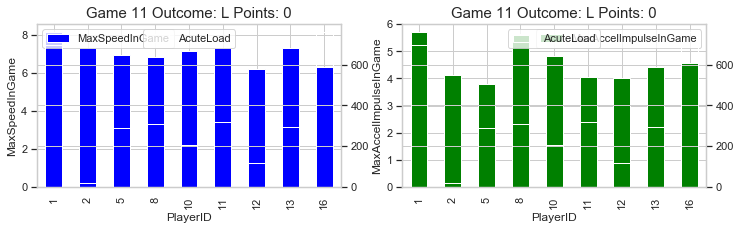

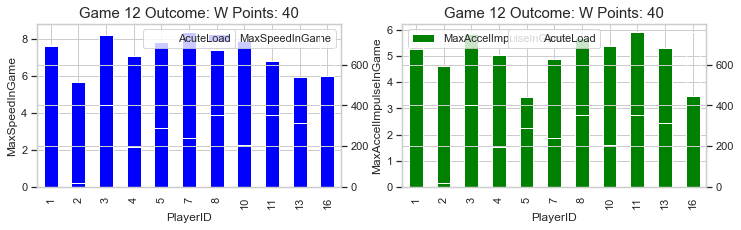

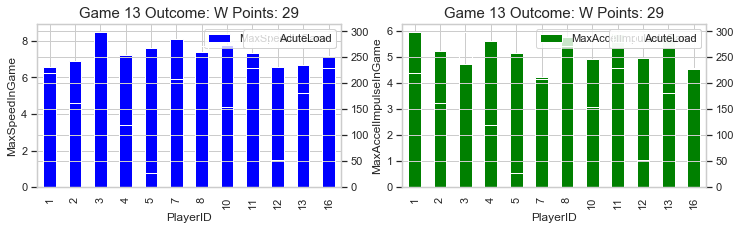

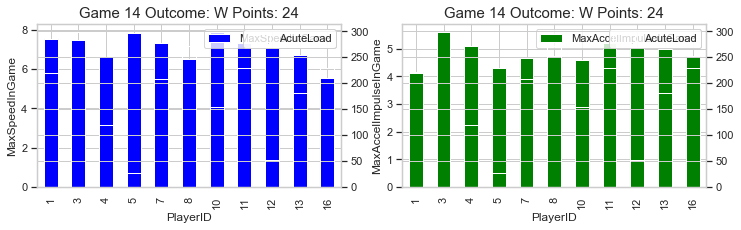

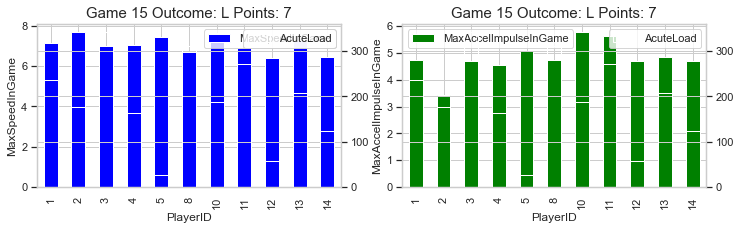

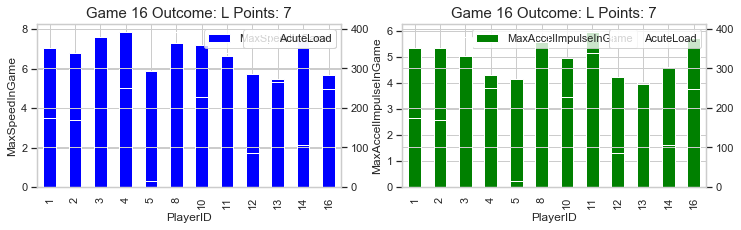

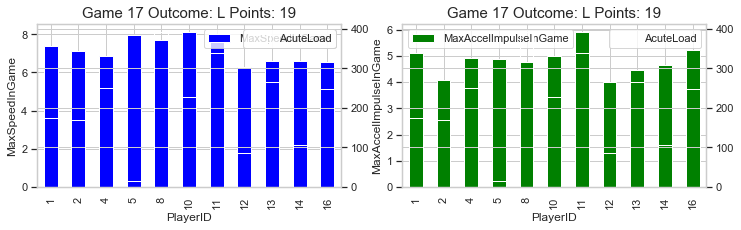

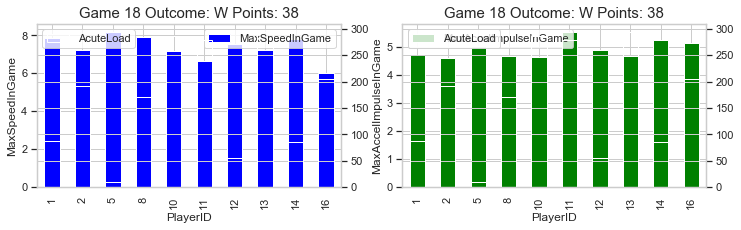

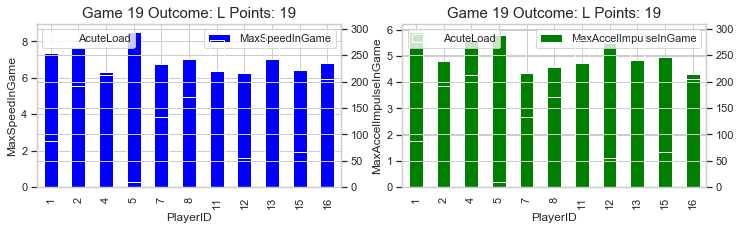

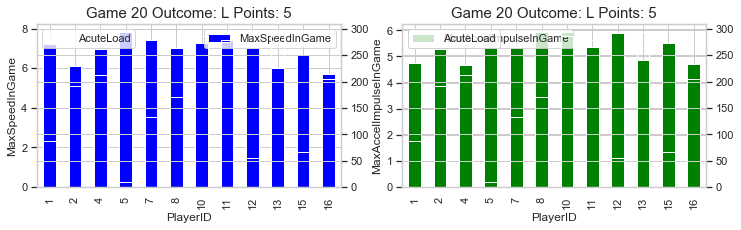

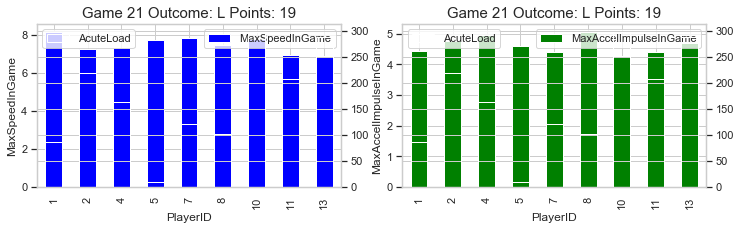

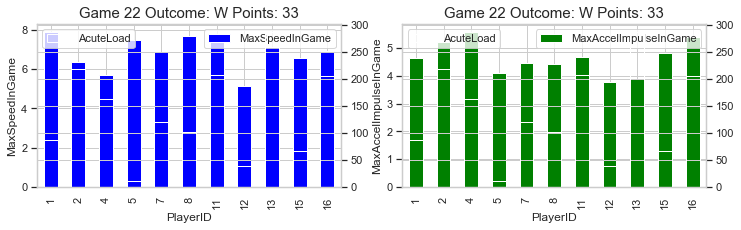

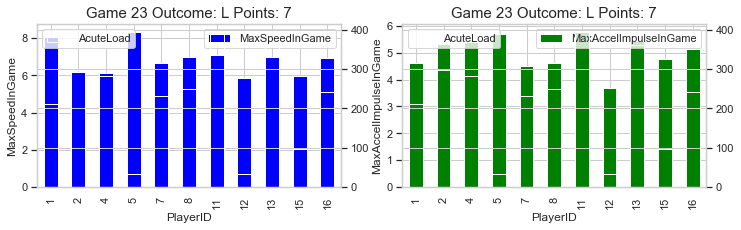

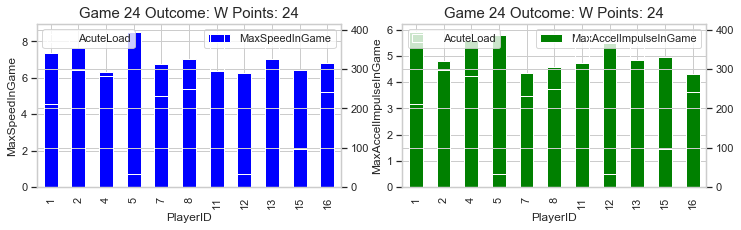

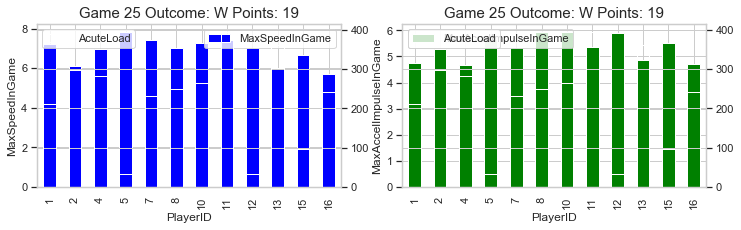

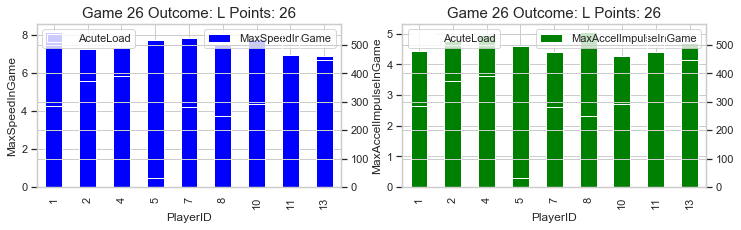

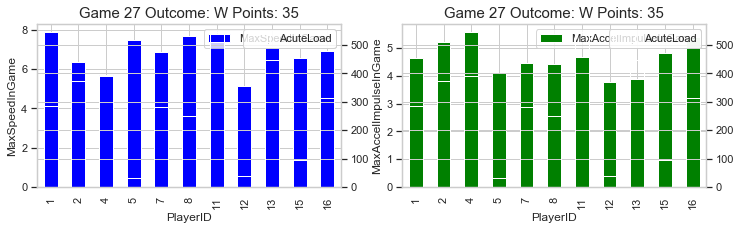

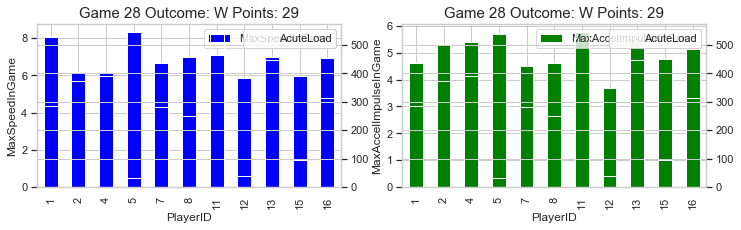

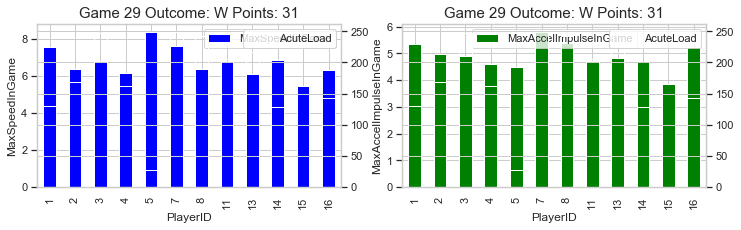

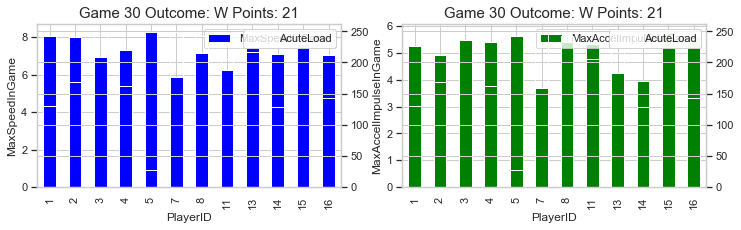

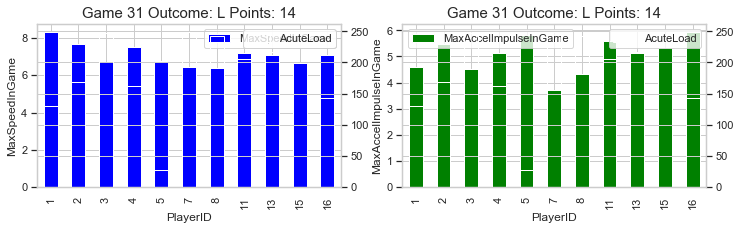

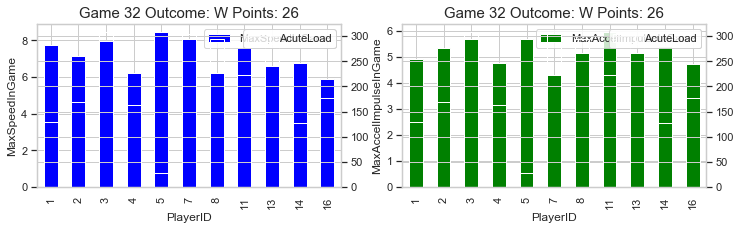

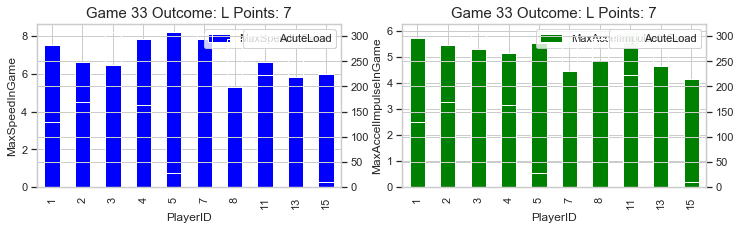

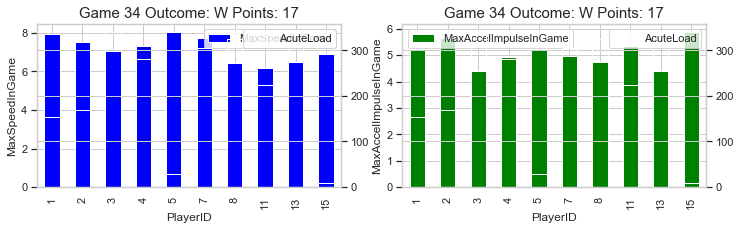

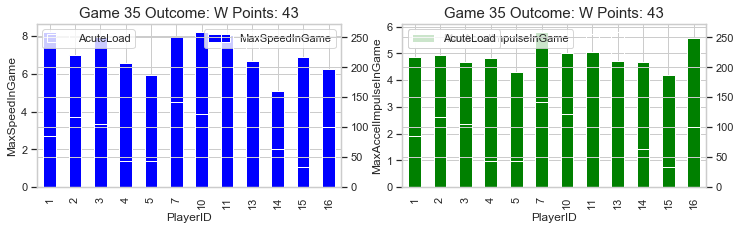

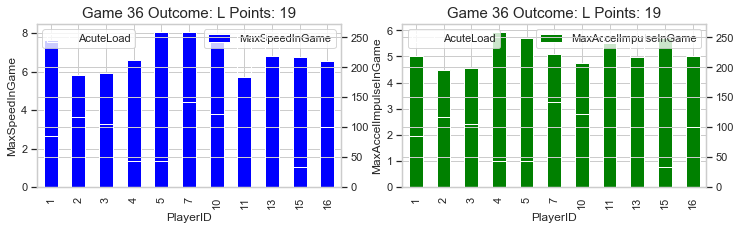

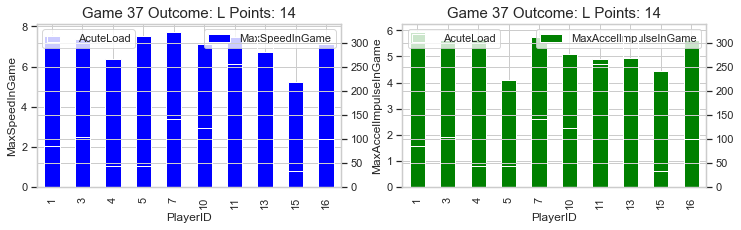

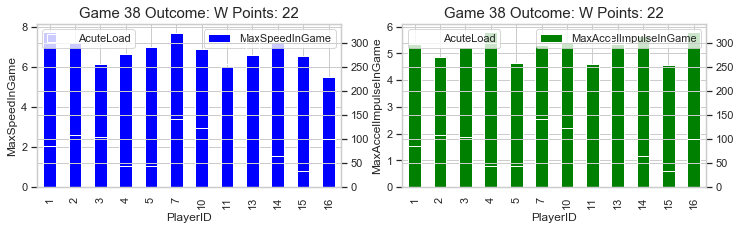

In [83]:
grouped_by_game = merged_df.groupby(['GameID','Outcome','TeamPoints'])

for name,group in grouped_by_game:
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(121)
#     ax.set_yticks(np.arange(min(y), max(y)+1, 1.0))
    group.plot.bar(ax=ax1, color='blue',x="PlayerID",y="MaxSpeedInGame")
    ax1.set_ylabel('MaxSpeedInGame')
    ax1.set_title('Game ' + str(name[0])+ 
                  ' Outcome: ' + str(name[1]) + 
                  ' Points: ' + str(name[2]), fontsize=15)
    ax3 = ax1.twinx()
    group.plot.bar(ax=ax3, color='red',
                    x='PlayerID',
                    y="AcuteLoad",fill=False)
    ax2 = fig.add_subplot(122)
    group.plot.bar(ax=ax2, color='green',x="PlayerID",y="MaxAccelImpulseInGame")
    ax2.set_ylabel('MaxAccelImpulseInGame')
    ax2.set_title('Game ' + str(name[0])+ 
                  ' Outcome: ' + str(name[1]) + 
                  ' Points: ' + str(name[2]), fontsize=15)
    ax4 = ax2.twinx()
    group.plot.bar(ax=ax4, color='red',
                    x='PlayerID',
                    y="AcuteLoad",fill=False)

plt.show()
plt.close()

# Performance vs wellness graphs per player

Index(['Date', 'GameID', 'Outcome', 'TeamPoints', 'PlayerID', 'MaxSpeedInGame',
       'MaxAccelImpulseInGame', 'AcuteLoad', 'ChronicLoad',
       'AcuteChronicRatio', 'MonitoringScore', 'Fatigue', 'Soreness', 'Desire',
       'Irritability', 'SleepScore', 'SleepHours', 'SleepQuality',
       'TrainingReadiness', 'Pain', 'Illness', 'Nutrition',
       'StandardizedMonitoringScore', 'StandardizedPain',
       'StandardizedIllness', 'StandardizedNutrition',
       'StandardizedTrainingReadiness', 'wellness', 'SquaredAcuteChronicRatio',
       'CubedAcuteChronicRatio'],
      dtype='object')
   GameID Outcome  TeamPoints  MaxSpeedInGame  MaxAccelImpulseInGame  \
0       1       W          19        6.905650               4.654848   
1       2       W          31        7.059107               4.598268   
2       3       W          31        7.214642               4.633742   
3       4       W          24        6.944925               4.856100   
6       7       W          24        6.99782

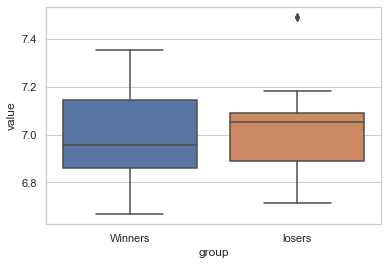

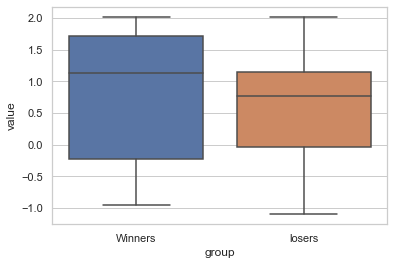

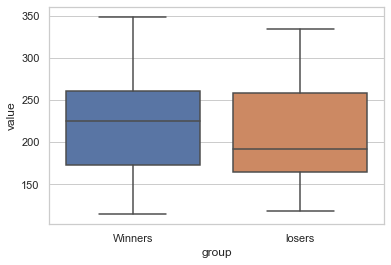

In [84]:
import seaborn as sns
print(merged_df.columns)
avg_speed_per_game = merged_df[['GameID','Outcome','TeamPoints','MaxSpeedInGame','MaxAccelImpulseInGame','wellness','MonitoringScore','AcuteLoad']].groupby(['GameID','Outcome','TeamPoints'],as_index=False).mean()
winners = avg_speed_per_game[avg_speed_per_game['Outcome'] == 'W']
losers = avg_speed_per_game[avg_speed_per_game['Outcome'] == 'L']
print(winners.head())
print(losers.head())
print('Max speed average')
print(winners['MaxSpeedInGame'].mean())
print(losers['MaxSpeedInGame'].mean())
print('max accel average')
print(winners['MaxAccelImpulseInGame'].mean())
print(losers['MaxAccelImpulseInGame'].mean())
from scipy import stats

t, p = stats.ttest_ind(winners['MaxSpeedInGame'], losers['MaxSpeedInGame'])

print("p-value is: %.4f" % p," t-statistic is: %.2f" % t)
t, p = stats.ttest_ind(winners['MaxAccelImpulseInGame'], losers['MaxAccelImpulseInGame'])

print("p-value is: %.4f" % p," t-statistic is: %.2f" % t)
t, p = stats.ttest_ind(winners['AcuteLoad'], losers['AcuteLoad'])

print("p-value is: %.4f" % p," t-statistic is: %.2f" % t)
plt.figure()
sns.set(context='notebook', style='whitegrid')
sns.utils.axlabel(xlabel="group", ylabel="value")
sns.boxplot(data=[winners['MaxSpeedInGame'], losers['MaxSpeedInGame']])
plt.xticks(plt.xticks()[0], ["Winners","losers"])
plt.show()
plt.figure()
sns.set(context='notebook', style='whitegrid')
sns.utils.axlabel(xlabel="group", ylabel="value")
sns.boxplot(data=[winners['wellness'], losers['wellness']])
plt.xticks(plt.xticks()[0], ["Winners","losers"])
plt.show()
plt.figure()
sns.set(context='notebook', style='whitegrid')
sns.utils.axlabel(xlabel="group", ylabel="value")
sns.boxplot(data=[winners['AcuteLoad'], losers['AcuteLoad']])
plt.xticks(plt.xticks()[0], ["Winners","losers"])
plt.show()

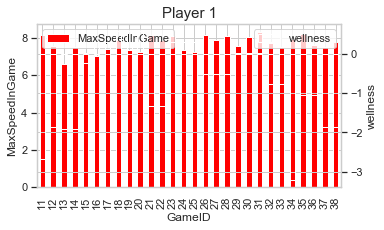

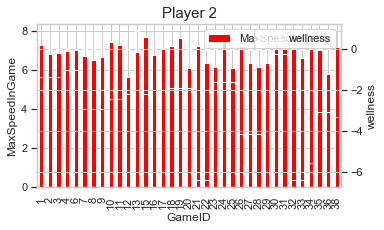

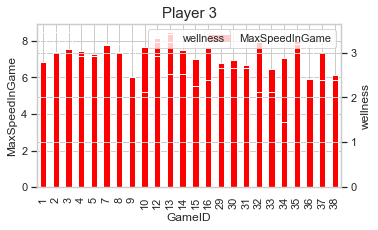

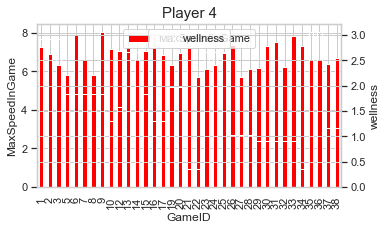

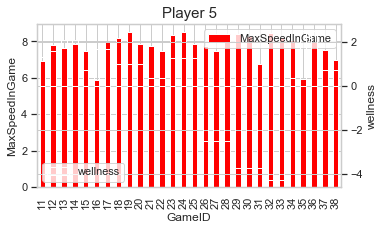

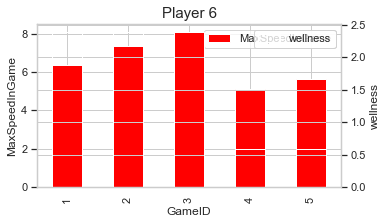

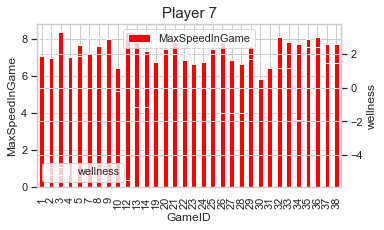

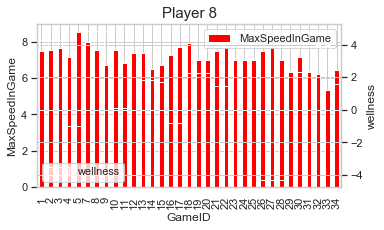

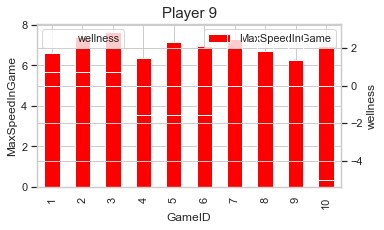

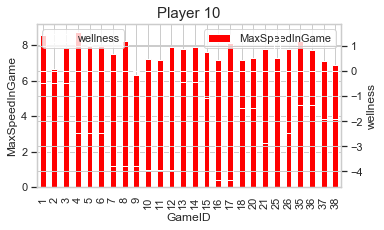

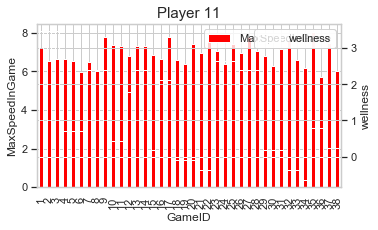

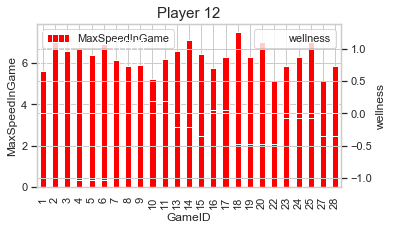

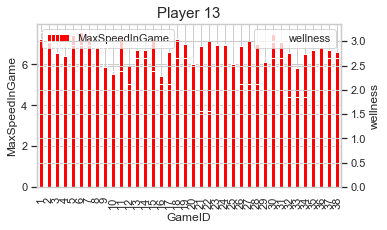

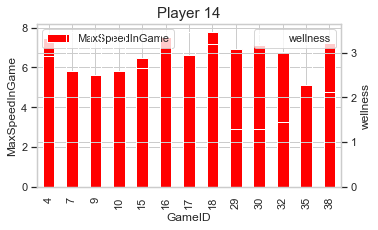

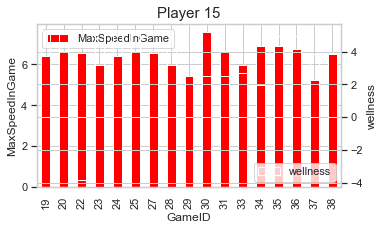

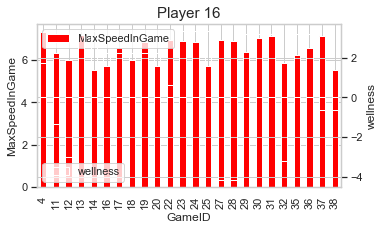

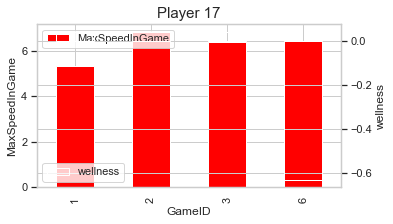

In [85]:
grouped = merged_df.groupby('PlayerID')

for name,group in grouped:
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(121)
#     group[]
    group.plot.bar(ax=ax1, color='red',x="GameID",y="MaxSpeedInGame")
    ax1.set_ylabel('MaxSpeedInGame')
    ax3 = ax1.twinx()
    group.plot.bar(ax=ax3, color='blue',x="GameID",y="wellness",fill=False)
    ax3.set_ylabel('wellness')
    ax1.set_title('Player ' + str(name), fontsize=15)



plt.show()
plt.close()

# Performance vs wellness and nutrition load graphs for each game for all players

C:\Users\Sarasadat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


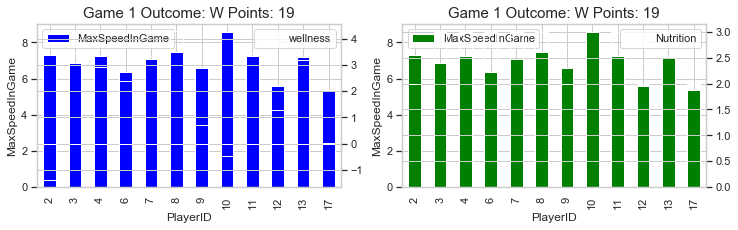

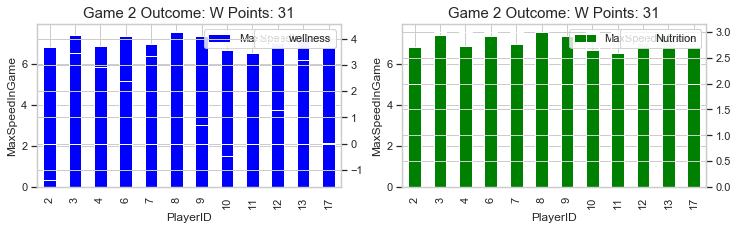

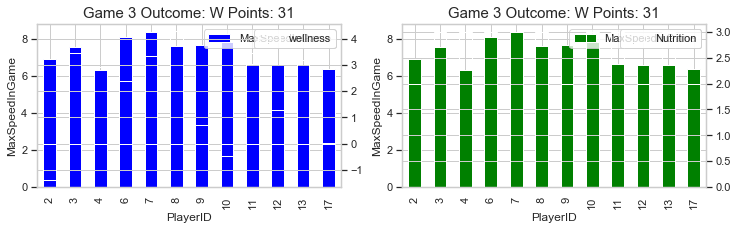

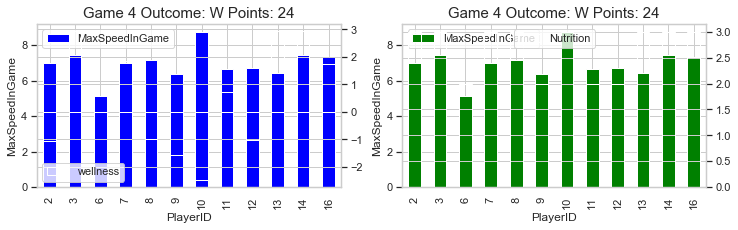

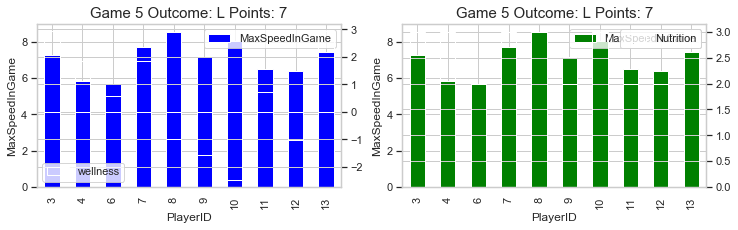

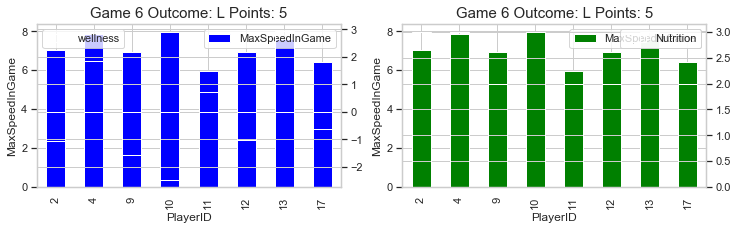

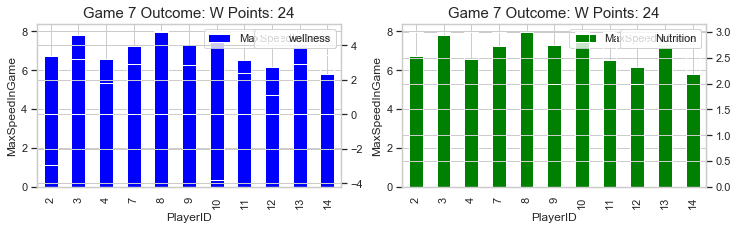

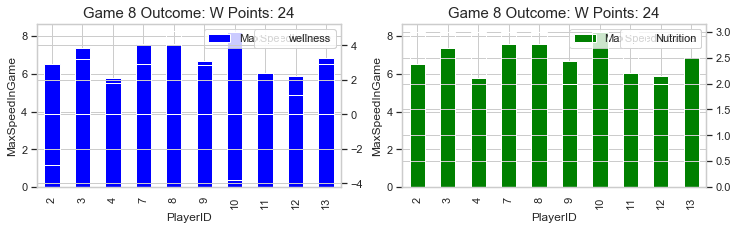

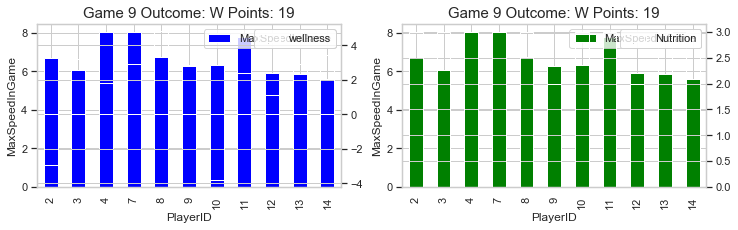

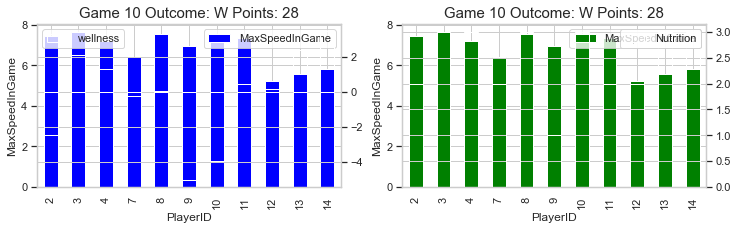

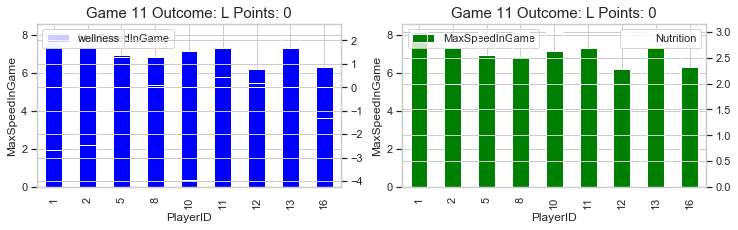

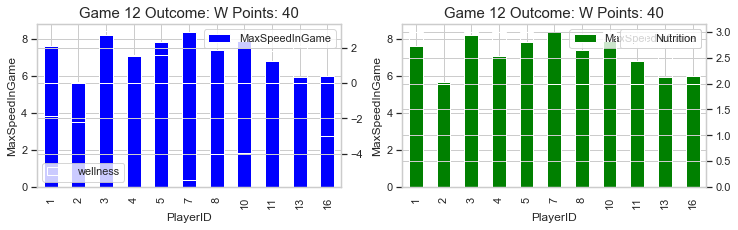

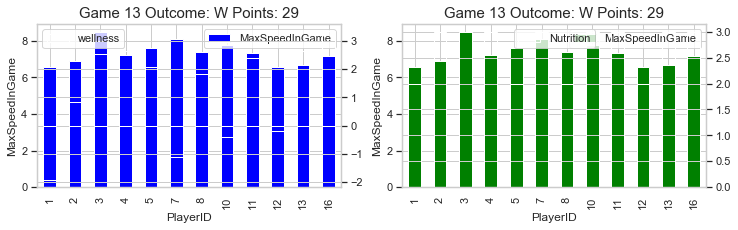

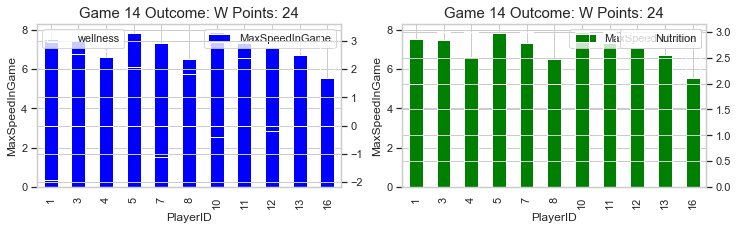

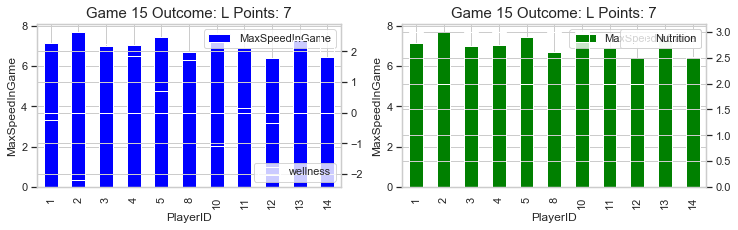

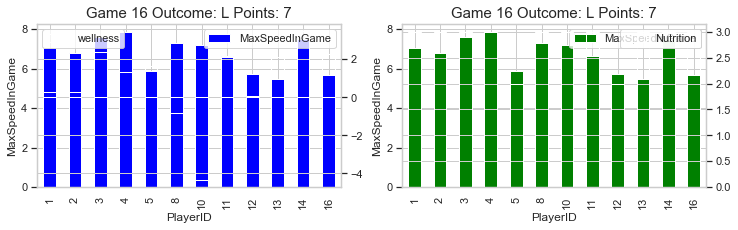

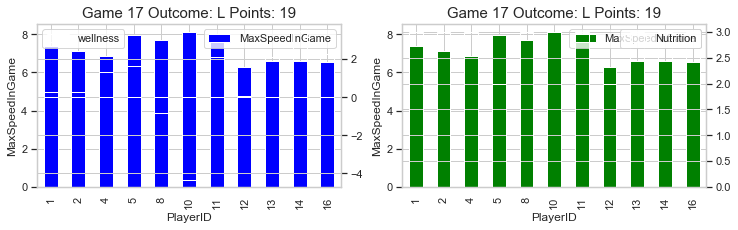

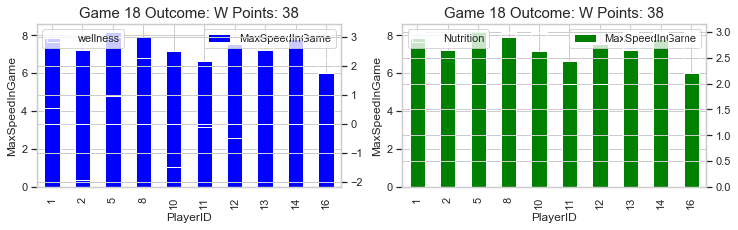

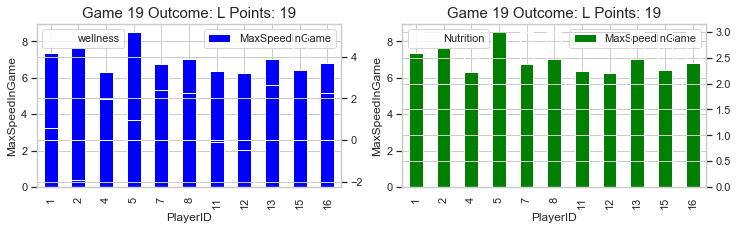

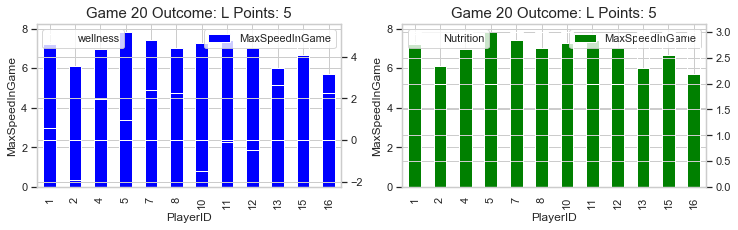

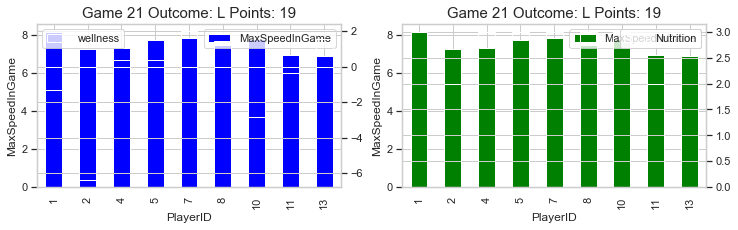

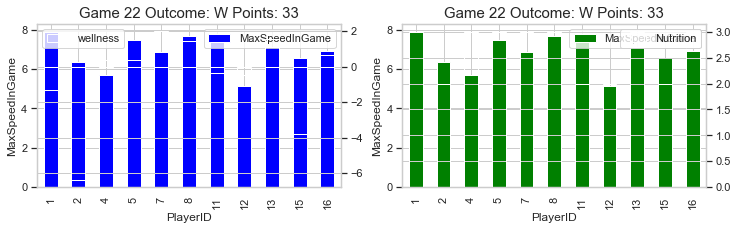

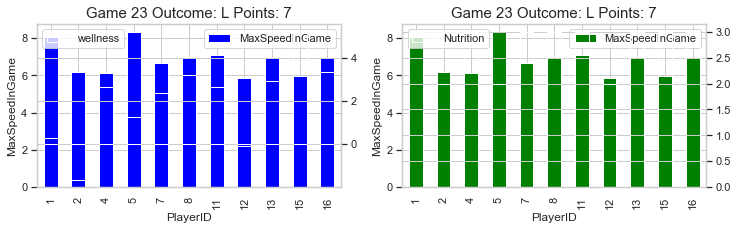

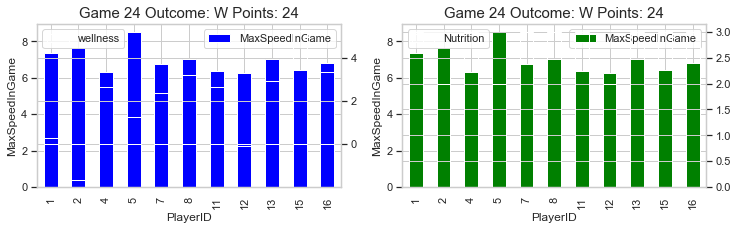

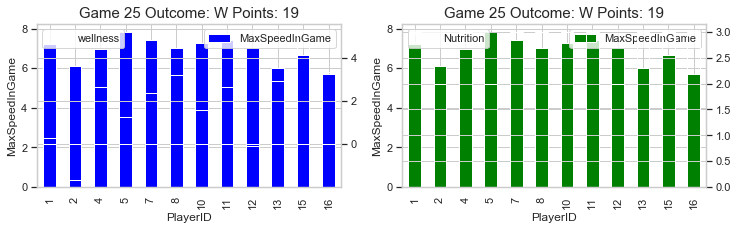

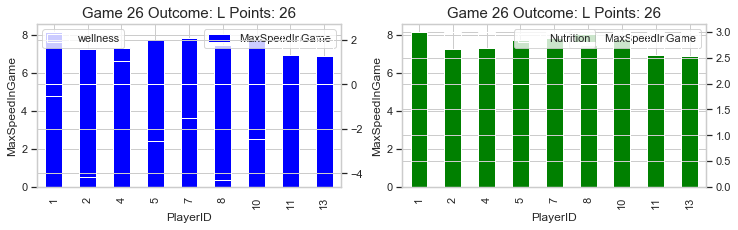

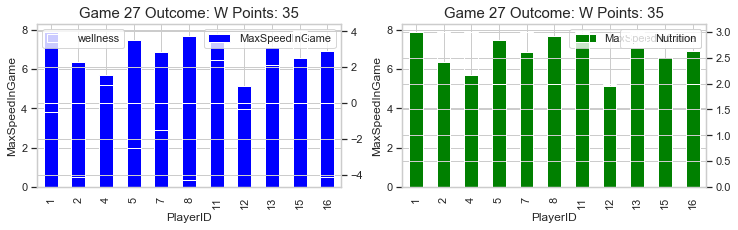

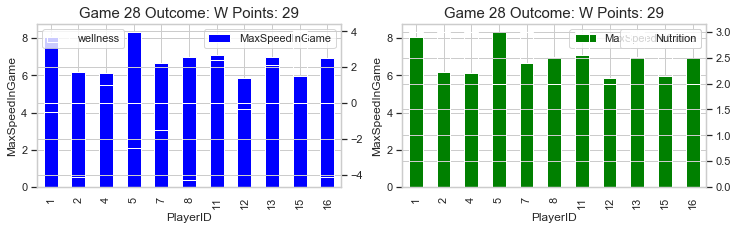

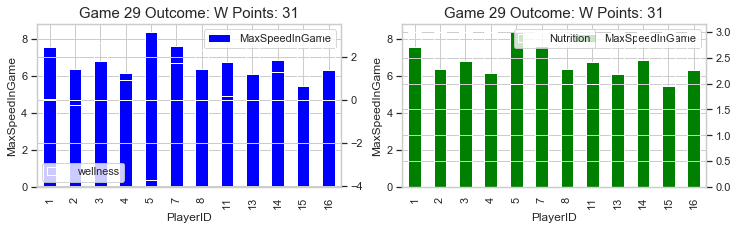

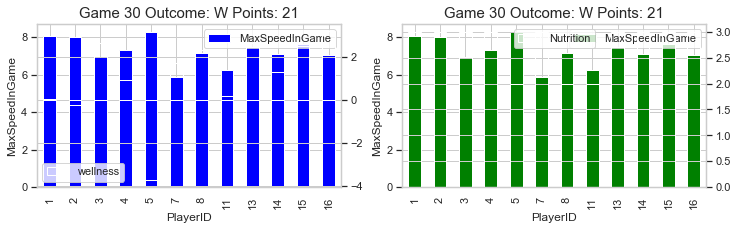

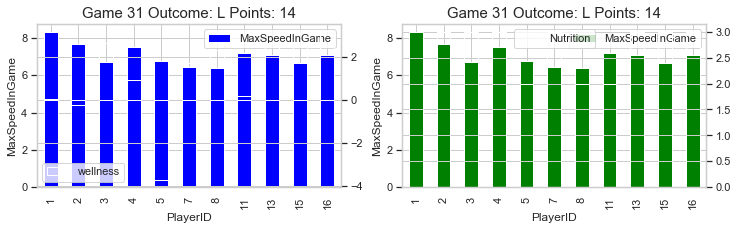

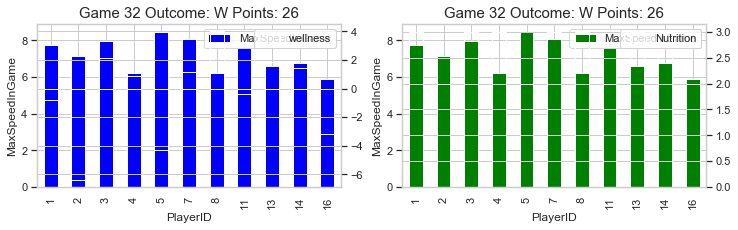

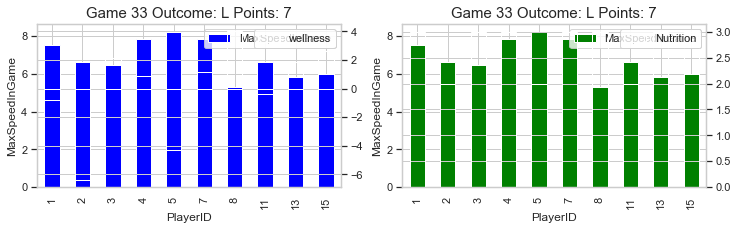

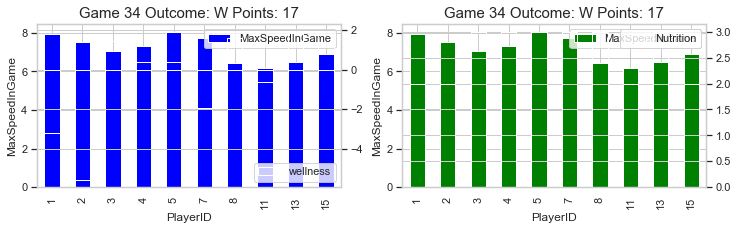

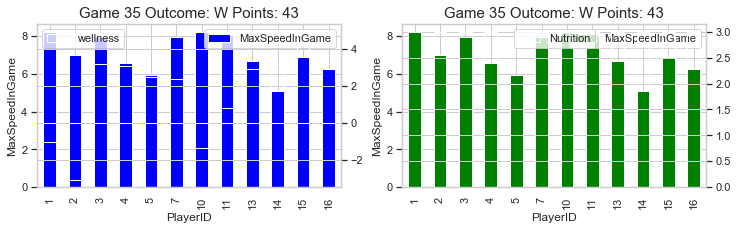

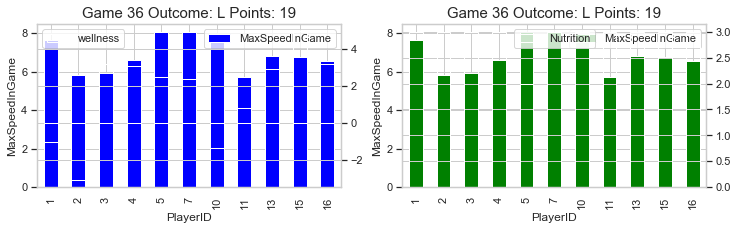

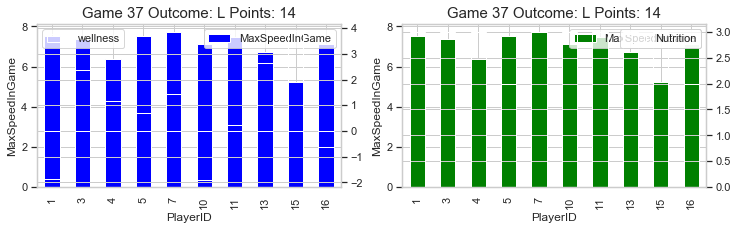

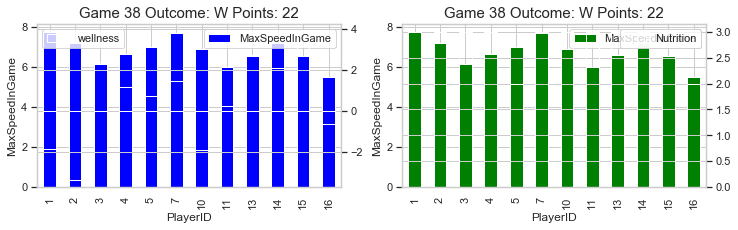

In [86]:
grouped_by_game = merged_df.groupby(['GameID','Outcome','TeamPoints'])

for name,group in grouped_by_game:
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(121)
#     ax.set_yticks(np.arange(min(y), max(y)+1, 1.0))
    group.plot.bar(ax=ax1, color='blue',x="PlayerID",y="MaxSpeedInGame")
    ax1.set_ylabel('MaxSpeedInGame')
    ax1.set_title('Game ' + str(name[0])+ 
                  ' Outcome: ' + str(name[1]) + 
                  ' Points: ' + str(name[2]), fontsize=15)
    ax3 = ax1.twinx()
    group.plot.bar(ax=ax3, color='red',
                    x='PlayerID',
                    y="wellness",fill=False)
    ax2 = fig.add_subplot(122)
    group.plot.bar(ax=ax2, color='green',x="PlayerID",y="MaxSpeedInGame")
    ax2.set_ylabel('MaxSpeedInGame')
    ax2.set_title('Game ' + str(name[0])+ 
                  ' Outcome: ' + str(name[1]) + 
                  ' Points: ' + str(name[2]), fontsize=15)
    ax4 = ax2.twinx()
    group.plot.bar(ax=ax4, color='red',
                    x='PlayerID',
                    y="Nutrition",fill=False)

plt.show()
plt.close()

In [87]:
print(len(rpe_df),len(wellness_df))
merged_df = rpe_df.merge(wellness_df,
    how='inner', on= ['Date','PlayerID']).drop_duplicates()
print(len(merged_df))


8860 5011
8416


Unfortunately there is no special relationship between the clusters for prformance, training and wellness.

In [88]:
merged_df.columns

Index(['Date', 'PlayerID', 'Training', 'SessionType', 'Duration', 'RPE',
       'SessionLoad', 'DailyLoad', 'AcuteChronicRatio', 'ObjectiveRating',
       'FocusRating', 'BestOutOfMyself', 'AcuteLoad', 'ChronicLoad',
       'MonitoringScore', 'Fatigue', 'Soreness', 'Desire', 'Irritability',
       'SleepScore', 'SleepHours', 'SleepQuality', 'TrainingReadiness', 'Pain',
       'Illness', 'Nutrition', 'StandardizedMonitoringScore',
       'StandardizedPain', 'StandardizedIllness', 'StandardizedNutrition',
       'StandardizedTrainingReadiness', 'wellness'],
      dtype='object')

# Training load on the day before and today's wellness

In [89]:
print(rpe_df.columns)
print(wellness_df.head())
yesterday_rpe = rpe_df.copy()[['Date','PlayerID','Training','SessionLoad','RPE','DailyLoad']]
print(yesterday_rpe.head())
yesterday_rpe['Date'] = pd.to_datetime(yesterday_rpe['Date'],format='%Y-%m-%d')
yesterday_rpe['Date'] = pd.DatetimeIndex(yesterday_rpe['Date']) + pd.DateOffset(1)
print(yesterday_rpe.head())

Index(['Date', 'PlayerID', 'Training', 'SessionType', 'Duration', 'RPE',
       'SessionLoad', 'DailyLoad', 'AcuteChronicRatio', 'ObjectiveRating',
       'FocusRating', 'BestOutOfMyself', 'AcuteLoad', 'ChronicLoad'],
      dtype='object')
         Date  PlayerID  MonitoringScore  Fatigue  Soreness  Desire  \
0  2018-07-21         1               13        3         3       2   
1  2018-07-21         2               19        4         3       4   
2  2018-07-21         3               19        3         3       5   
3  2018-07-21         4               15        2         3       5   
4  2018-07-21         5               20        5         3       4   

   Irritability  SleepScore  SleepHours  SleepQuality  TrainingReadiness  \
0             3        16.0        8.00             2                  0   
1             4        32.0        8.00             4                  0   
2             4        32.0        8.00             4                100   
3             4         6.5  

In [90]:
wellness_df['Date'] = pd.to_datetime(wellness_df['Date'],format='%Y-%m-%d')
wellness_with_yesterday_training = yesterday_rpe.merge(wellness_df,
    how='inner', on= ['Date','PlayerID'])[['Date','PlayerID','DailyLoad','MonitoringScore','TrainingReadiness','Pain','Illness','Nutrition','wellness']].drop_duplicates()
print(wellness_with_yesterday_training[(wellness_with_yesterday_training['PlayerID'] == 1) | (wellness_with_yesterday_training['PlayerID'] == 2)])
# plot_df = wellness_with_yesterday_training.groupby()
# scatter_plot(wellness_with_yesterday_training, 'wellness', 'MaxSpeedInGame', 'wellness VS Performance')


           Date  PlayerID  DailyLoad  MonitoringScore  TrainingReadiness  \
315  2017-08-17         1        0.0               19                 80   
316  2017-08-17         2       40.0               18                 80   
343  2017-08-18         2      870.0               19                 75   
346  2017-08-18         1      510.0               20                 85   
378  2017-08-19         1     1230.0               21                  0   
...         ...       ...        ...              ...                ...   
8286 2018-07-18         2      280.0               24                  0   
8302 2018-07-19         1        0.0               20                  0   
8303 2018-07-19         2        0.0               22                  0   
8310 2018-07-20         1      180.0               16                  0   
8311 2018-07-20         2      240.0               20                  0   

      Pain  Illness  Nutrition  wellness  
315      1        3          3  1.860020  
3

In [91]:
print(wellness_with_yesterday_training[(wellness_with_yesterday_training['PlayerID'] == 1)])

           Date  PlayerID  DailyLoad  MonitoringScore  TrainingReadiness  \
315  2017-08-17         1        0.0               19                 80   
346  2017-08-18         1      510.0               20                 85   
378  2017-08-19         1     1230.0               21                  0   
408  2017-08-20         1        0.0               20                100   
454  2017-08-22         1      670.0               17                 85   
...         ...       ...        ...              ...                ...   
8259 2018-07-15         1        0.0               21                  0   
8268 2018-07-17         1      240.0               18                  0   
8284 2018-07-18         1      180.0               15                  0   
8302 2018-07-19         1        0.0               20                  0   
8310 2018-07-20         1      180.0               16                  0   

      Pain  Illness  Nutrition  wellness  
315      1        3          3  1.860020  
3

In [92]:
wellness_with_yesterday_training.sort_values(by=['Date', 'PlayerID'], inplace=True)

# for this example, with diff, I think this syntax is a bit clunky
# but for more general examples, this should be good.  But can we do better?
wellness_with_yesterday_training['wellness_diffs'] = wellness_with_yesterday_training.groupby(['PlayerID'])['wellness'].transform(lambda x: x.diff()) 

wellness_with_yesterday_training.sort_index(inplace=True)
print(wellness_with_yesterday_training[(wellness_with_yesterday_training['PlayerID'] == 1)])

           Date  PlayerID  DailyLoad  MonitoringScore  TrainingReadiness  \
315  2017-08-17         1        0.0               19                 80   
346  2017-08-18         1      510.0               20                 85   
378  2017-08-19         1     1230.0               21                  0   
408  2017-08-20         1        0.0               20                100   
454  2017-08-22         1      670.0               17                 85   
...         ...       ...        ...              ...                ...   
8259 2018-07-15         1        0.0               21                  0   
8268 2018-07-17         1      240.0               18                  0   
8284 2018-07-18         1      180.0               15                  0   
8302 2018-07-19         1        0.0               20                  0   
8310 2018-07-20         1      180.0               16                  0   

      Pain  Illness  Nutrition  wellness  wellness_diffs  
315      1        3         

In [93]:
print(wellness_with_yesterday_training[(wellness_with_yesterday_training['PlayerID'] == 2)])
processed = wellness_with_yesterday_training.copy()
processed['DailyLoad'] = StandardScaler().fit_transform(wellness_with_yesterday_training[['DailyLoad']])
print(processed[(processed['PlayerID'] == 2)])

           Date  PlayerID  DailyLoad  MonitoringScore  TrainingReadiness  \
316  2017-08-17         2       40.0               18                 80   
343  2017-08-18         2      870.0               19                 75   
385  2017-08-19         2     1170.0               22                  0   
409  2017-08-20         2        0.0               23                  0   
423  2017-08-21         2        0.0               20                 85   
...         ...       ...        ...              ...                ...   
8258 2018-07-15         2       60.0               25                  0   
8270 2018-07-17         2      240.0               19                  0   
8286 2018-07-18         2      280.0               24                  0   
8303 2018-07-19         2        0.0               22                  0   
8311 2018-07-20         2      240.0               20                  0   

      Pain  Illness  Nutrition  wellness  wellness_diffs  
316      1        3         

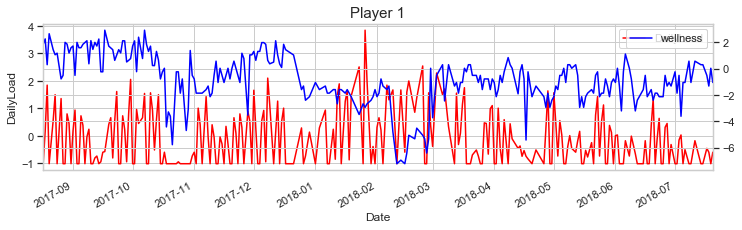

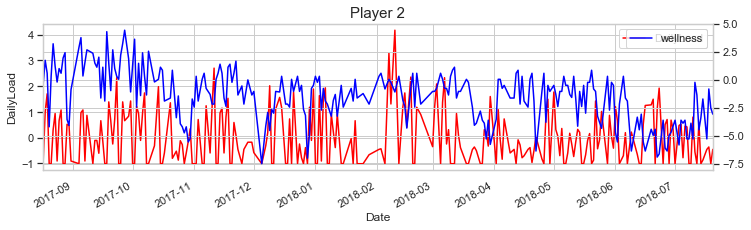

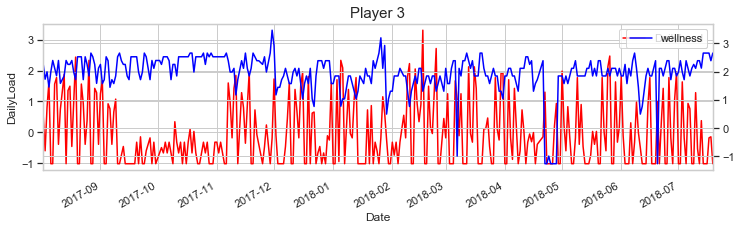

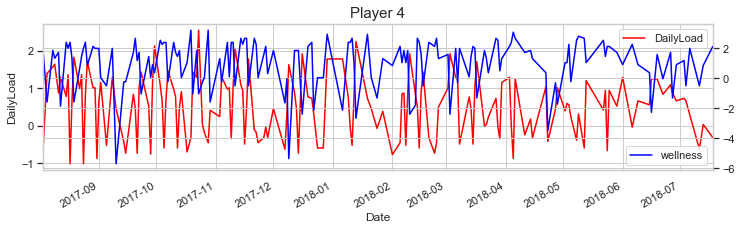

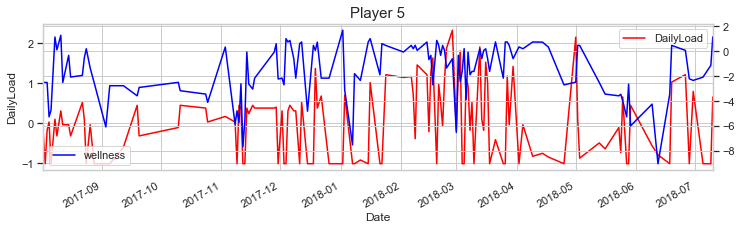

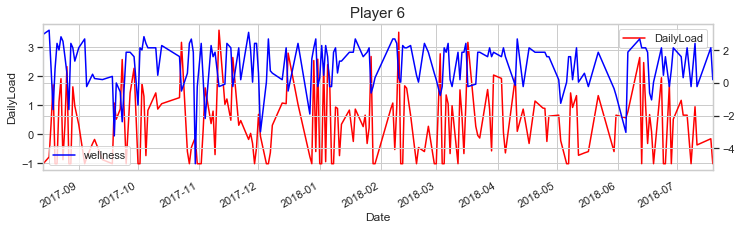

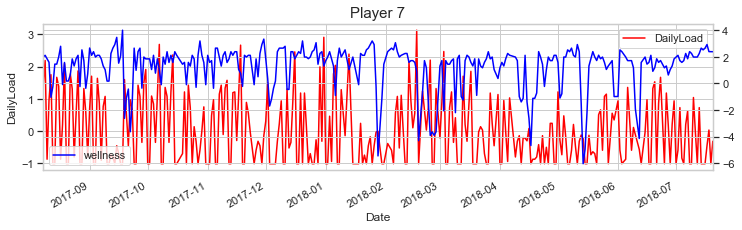

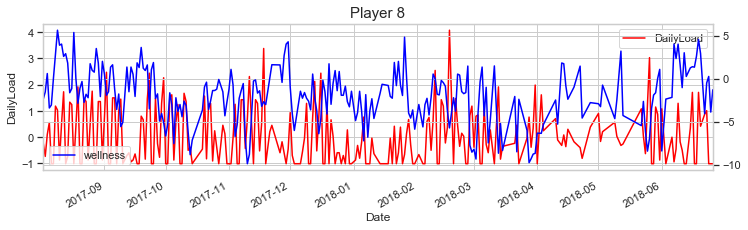

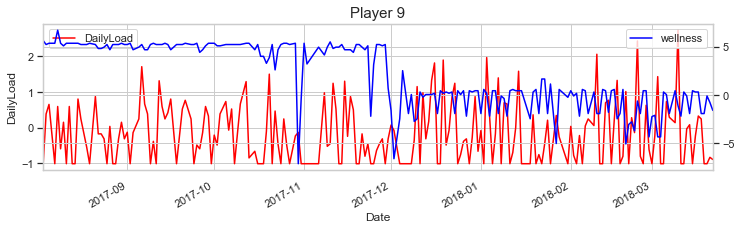

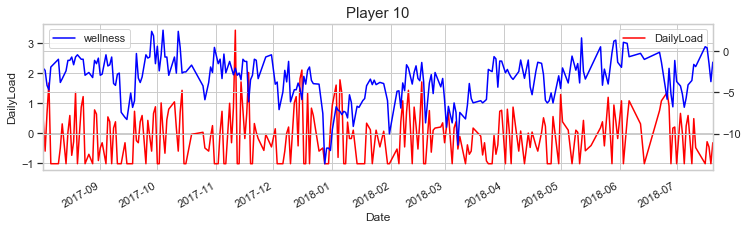

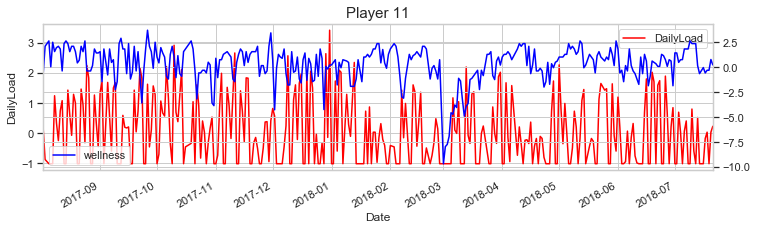

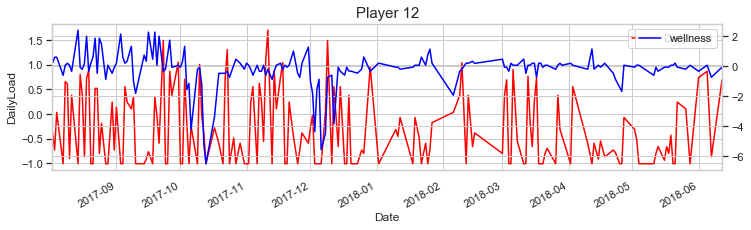

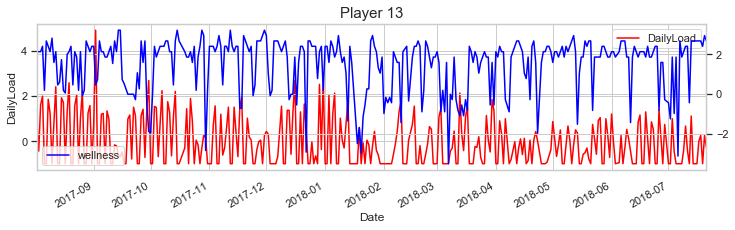

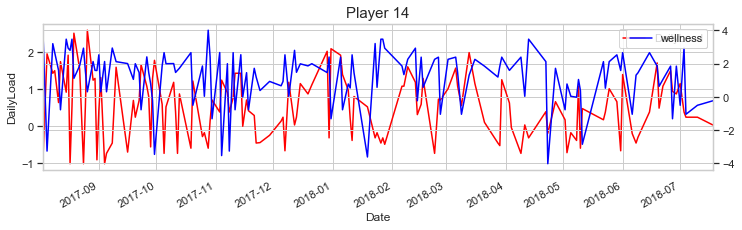

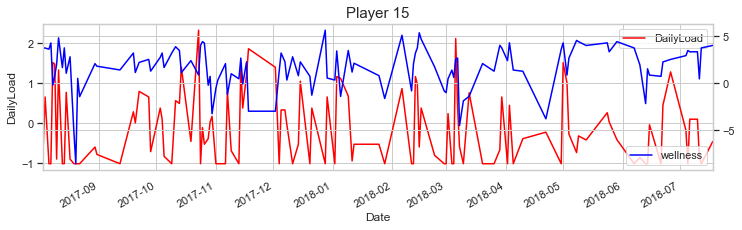

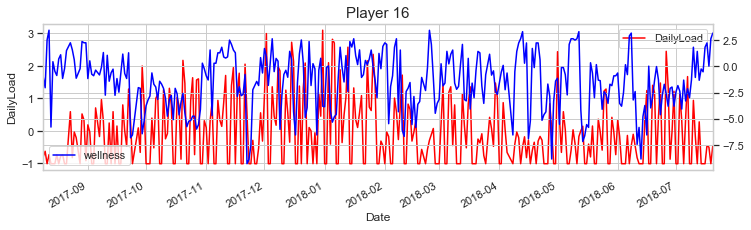

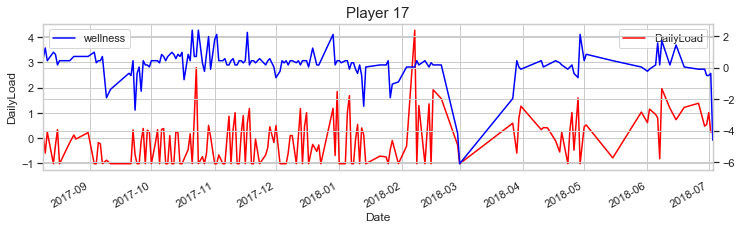

In [94]:
grouped = processed.groupby(['PlayerID'])

for name,group in grouped:
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(111)

    group.plot.line(ax=ax1, color='red',x="Date",y="DailyLoad")
    ax1.set_ylabel('DailyLoad')
    ax3 = ax1.twinx()
    group.plot.line(ax=ax3, color='blue',x="Date",y="wellness")

    ax1.set_title('Player ' + str(name), fontsize=15)

plt.show()
plt.close()

In [95]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# merged_df['SquaredAcuteChronicRatio'] = merged_df['AcuteChronicRatio'] ** 2
# merged_df['CubedAcuteChronicRatio'] = merged_df['AcuteChronicRatio'] ** 3

fam = sm.families.Gaussian()
ind = sm.cov_struct.Exchangeable()
# ind = sm.cov_struct.Independence()
mod = smf.gee("wellness ~ DailyLoad", "PlayerID", processed, cov_struct=ind, family=fam)
res = mod.fit()
print(res.summary())

                               GEE Regression Results                              
Dep. Variable:                    wellness   No. Observations:                 4047
Model:                                 GEE   No. clusters:                       17
Method:                        Generalized   Min. cluster size:                 121
                      Estimating Equations   Max. cluster size:                 343
Family:                           Gaussian   Mean cluster size:               238.1
Dependence structure:         Exchangeable   Num. iterations:                     4
Date:                     Mon, 09 Dec 2019   Scale:                           6.726
Covariance type:                    robust   Time:                         16:47:12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0829      0.378      0.220      0.826      -0.657       0.823
DailyLo

In [96]:
processed = processed.dropna()
mixed = smf.mixedlm("wellness ~ DailyLoad", processed, groups = processed["PlayerID"])
mixed_fit = mixed.fit()
print(mixed_fit.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: wellness  
No. Observations: 4030    Method:             REML      
No. Groups:       17      Scale:              4.2402    
Min. group size:  120     Likelihood:         -8672.4552
Max. group size:  342     Converged:          Yes       
Mean group size:  237.1                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      0.078    0.388  0.201 0.840 -0.683  0.839
DailyLoad     -0.093    0.033 -2.809 0.005 -0.157 -0.028
Group Var      2.544    0.441                           



In [97]:
processed['wellness'].std()

2.5929798906530186

In [98]:
processed['wellness'].quantile(0.25)

-1.3185861289498129

In [99]:
processed['wellness'].median()

0.4501752655233835

In [100]:
processed['wellness'].quantile(0.75)

1.8600197161422896

In [101]:
processed['DailyLoad'].std()

1.001049905211623

In [102]:
processed['DailyLoad'].quantile(0.25)

-1.0128931791732334

In [103]:
processed['DailyLoad'].quantile(0.4)

-0.5715955652859062

In [104]:
processed['DailyLoad'].median()

-0.22320271221696367

In [105]:
processed['DailyLoad'].quantile(0.60)

0.148416331056575

In [106]:
processed['DailyLoad'].quantile(0.75)

0.7290710861714792

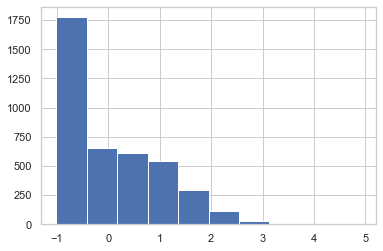

In [107]:
processed['DailyLoad'].hist()

# Performance vs yesterday's daily load

In [108]:
gps_df = pd.read_csv('./processed_data/processed_gps.csv')
gps_df = gps_df.drop(columns=['Unnamed: 0'])
gps_df['Date'] = pd.to_datetime(gps_df['Date'],format='%Y-%m-%d')
print(gps_df.head())

        Date  GameID Outcome  TeamPoints  PlayerID  MaxSpeedInGame  \
0 2017-11-30       1       W          19         2        7.284728   
1 2017-11-30       1       W          19         3        6.852436   
2 2017-11-30       1       W          19         4        7.267784   
3 2017-11-30       1       W          19         6        6.338894   
4 2017-11-30       1       W          19         7        7.065283   

   MaxAccelImpulseInGame  
0               4.423615  
1               4.888893  
2               5.694449  
3               4.777782  
4               4.091273  


In [109]:
speed_vs_yesterday_load = gps_df.merge(yesterday_rpe,
    how='inner', on= ['Date','PlayerID'])[['Date','PlayerID','DailyLoad','MaxSpeedInGame','MaxAccelImpulseInGame']].drop_duplicates()

processed_speed = speed_vs_yesterday_load.copy()
processed_speed = processed_speed[(processed_speed['MaxSpeedInGame'] >= 4) & (processed_speed['MaxSpeedInGame'] <= 9)]
processed_speed[['DailyLoad','MaxSpeedInGame','MaxAccelImpulseInGame']] = StandardScaler().fit_transform(processed_speed[['DailyLoad','MaxSpeedInGame','MaxAccelImpulseInGame']])


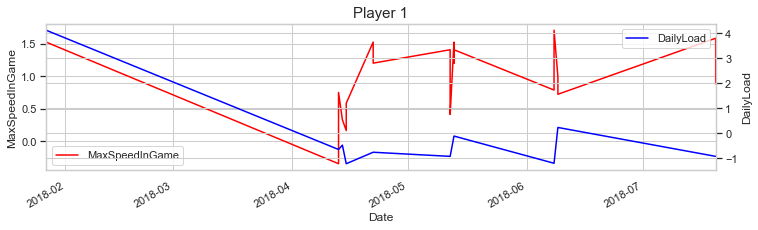

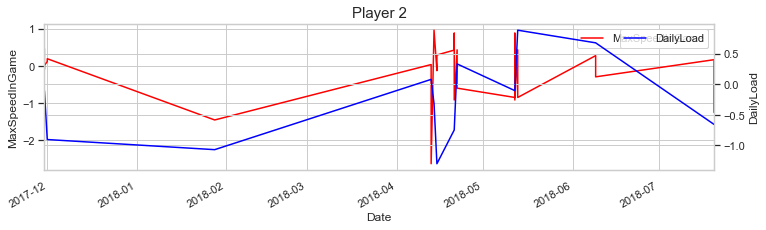

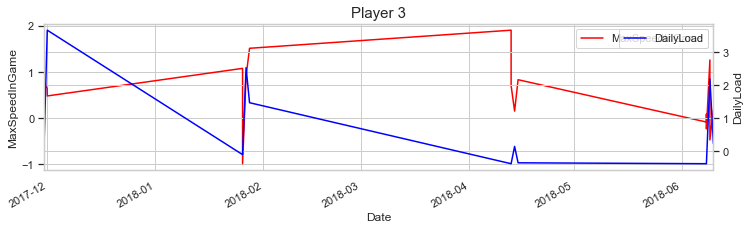

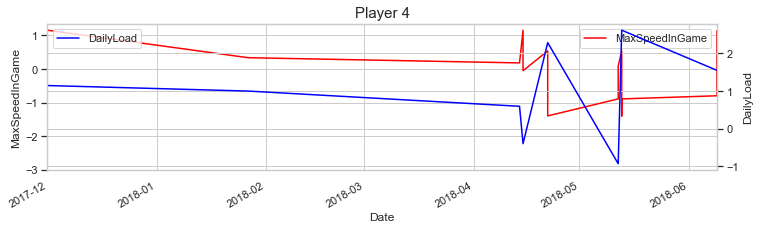

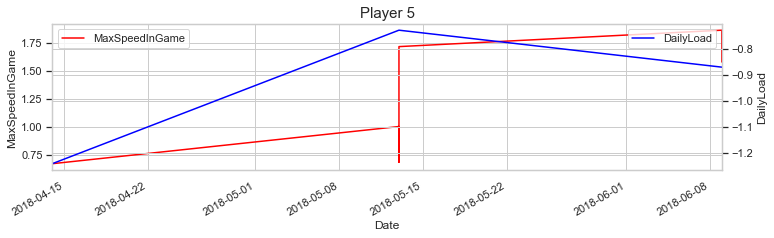

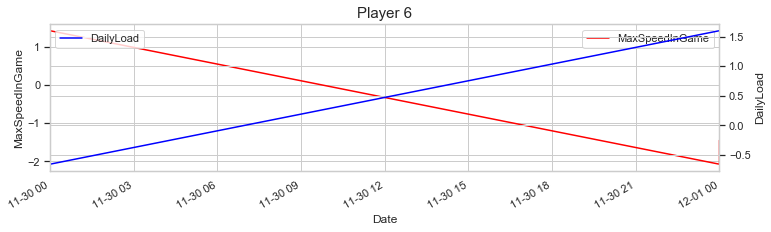

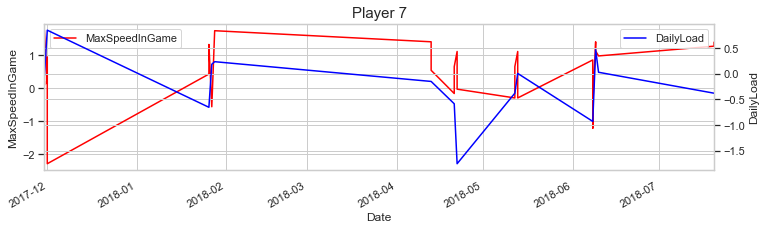

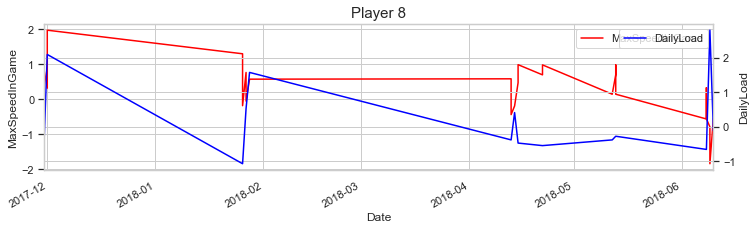

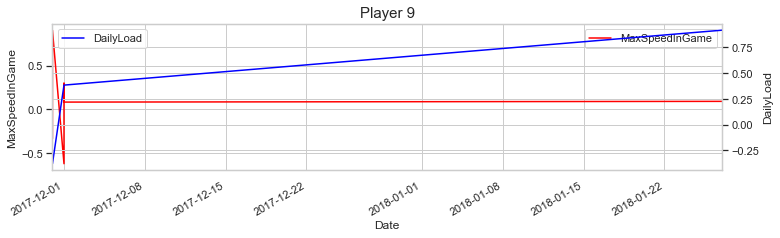

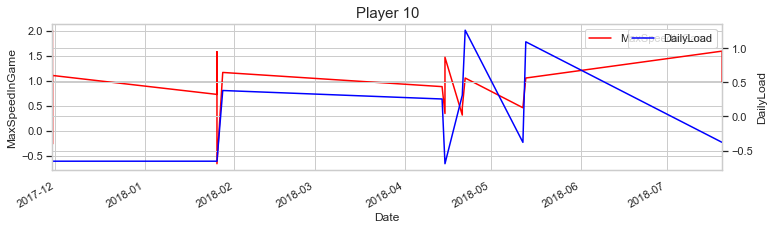

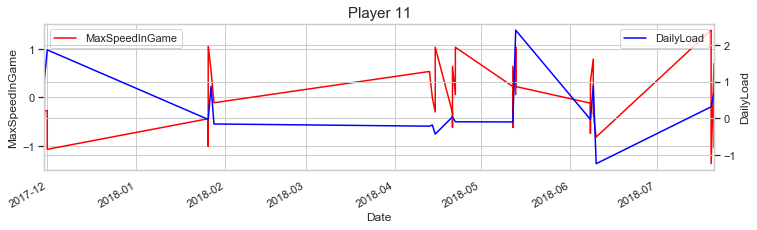

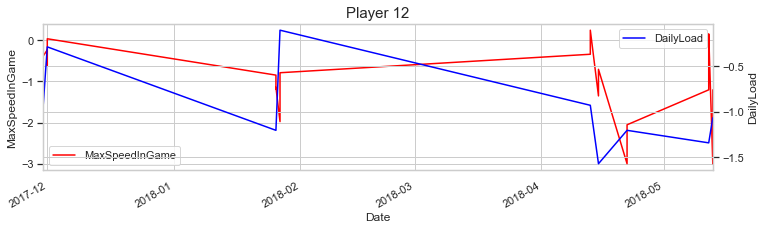

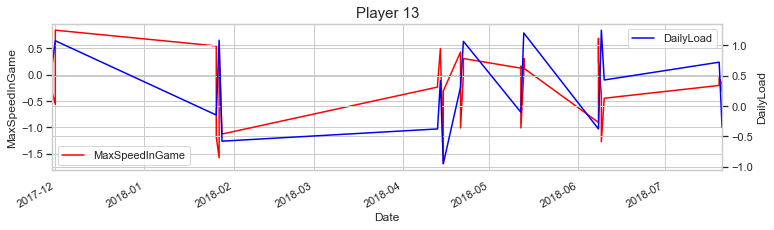

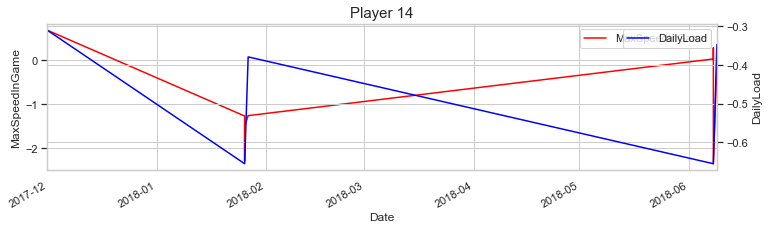

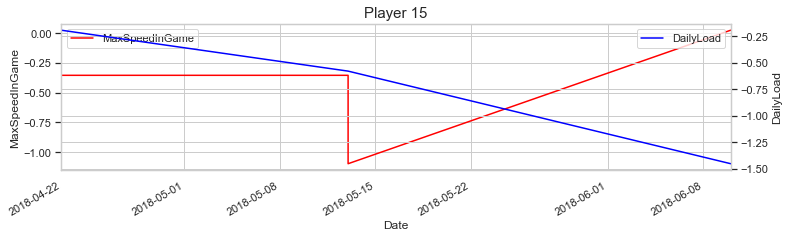

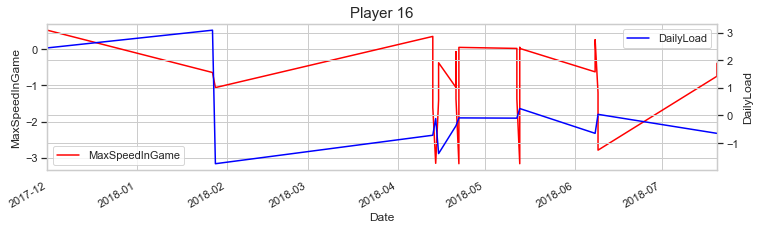

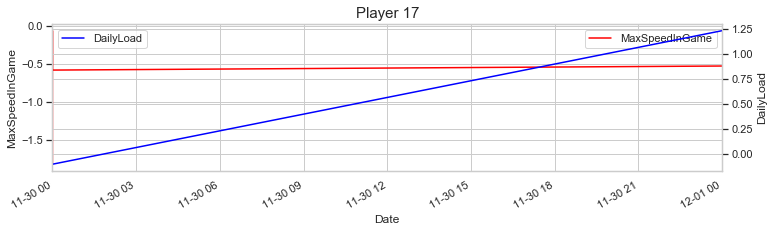

In [110]:
grouped = processed_speed.groupby(['PlayerID'])

for name,group in grouped:
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(111)
#     group[]
    group.plot.line(ax=ax1, color='red',x="Date",y="MaxSpeedInGame")
    ax1.set_ylabel('MaxSpeedInGame')
    ax3 = ax1.twinx()
    group.plot.line(ax=ax3, color='blue',x="Date",y="DailyLoad")
    ax3.set_ylabel('DailyLoad')
    ax1.set_title('Player ' + str(name), fontsize=15)

plt.show()
plt.close()

In [111]:
mod = smf.gee("MaxSpeedInGame ~ DailyLoad", "PlayerID", processed_speed, cov_struct=ind, family=fam)
res = mod.fit()
print(res.summary())

                               GEE Regression Results                              
Dep. Variable:              MaxSpeedInGame   No. Observations:                  322
Model:                                 GEE   No. clusters:                       17
Method:                        Generalized   Min. cluster size:                   4
                      Estimating Equations   Max. cluster size:                  38
Family:                           Gaussian   Mean cluster size:                18.9
Dependence structure:         Exchangeable   Num. iterations:                     5
Date:                     Mon, 09 Dec 2019   Scale:                           1.007
Covariance type:                    robust   Time:                         16:47:28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0179      0.158     -0.113      0.910      -0.328       0.292
DailyLo

In [112]:
print(len(gps_df),len(processed_speed))
mixed = smf.mixedlm("MaxSpeedInGame ~ DailyLoad", processed_speed, groups = processed_speed["PlayerID"])
mixed_fit = mixed.fit()
print(mixed_fit.summary())

443 322
           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: MaxSpeedInGame
No. Observations: 322     Method:             REML          
No. Groups:       17      Scale:              0.6825        
Min. group size:  4       Likelihood:         -416.8700     
Max. group size:  38      Converged:          Yes           
Mean group size:  18.9                                      
-------------------------------------------------------------
              Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-------------------------------------------------------------
Intercept     -0.023     0.164  -0.140  0.888  -0.345   0.299
DailyLoad     -0.011     0.052  -0.209  0.834  -0.113   0.091
Group Var      0.400     0.202                               



Previous day's daily load negativel affects today's performance as well as wellness.

In [113]:
print(processed_speed['MaxSpeedInGame'].std())
print(processed_speed['DailyLoad'].std())
print(processed_speed['MaxSpeedInGame'].median())
print(processed_speed['DailyLoad'].median())
print(processed_speed['MaxSpeedInGame'].quantile(0.75))
print(processed_speed['DailyLoad'].quantile(0.75))

1.001556421175316
1.0015564211753167
0.1195345149002159
-0.14940351064704868
0.6841492283593107
0.3835465351641025


# Performance vs training load and wellness

In [114]:
all_data = pd.read_csv('./processed_data/merged_df.csv')
all_data = all_data.drop(columns=['Unnamed: 0'])
print(all_data.head())

         Date  GameID Outcome  TeamPoints  PlayerID  MaxSpeedInGame  \
0  2017-11-30       1       W          19         2        7.284728   
1  2017-11-30       1       W          19         3        6.852436   
2  2017-11-30       1       W          19         4        7.267784   
3  2017-11-30       1       W          19         6        6.338894   
4  2017-11-30       1       W          19         7        7.065283   

   MaxAccelImpulseInGame  AcuteLoad  ChronicLoad  AcuteChronicRatio  ...  \
0               4.423615     206.57       371.20               0.56  ...   
1               4.888893     407.86       454.67               0.90  ...   
2               5.694449     236.00       406.90               0.58  ...   
3               4.777782     297.29       415.87               0.71  ...   
4               4.091273     237.57       476.60               0.50  ...   

   Illness  Nutrition  StandardizedMonitoringScore  StandardizedPain  \
0      3.0        2.0                     0.